# index and test calf data
## lsaa-staging-cog

In [1]:
%matplotlib inline

# Get the AOI using geojson.io


http://geojson.io/#map=10/30.2/-2.2

In [2]:
import datetime
from lilcubeLib.lc_api import Lilcube

my_aoi_file = 'pine_lake.geojson'

# date_range = (datetime.datetime(2013,2,1), datetime.datetime(2015,7,31))
date_range = (datetime.datetime(2014,1,20), datetime.datetime(2014,5,28))



es_index = 'cube'
es_type = 'calif'

lc = Lilcube()

measurements = ('red','green','blue',)

# return a pandas data frame product id creation date and red
panda_df = lc.search(es_index, es_type, my_aoi_file, 
             time = date_range, measurements = measurements )

creating Lilcube class
Your Index is: cube
Your Record Type for this index is: calif
Yay Connect


In [3]:
# panda_df

# That's Cool What's NEXT Tony?

0. test load and organize the index main into bin
1. index all of L8 - california
2. play with tighter date ranges - 
3. make lc.load return build_array
4. expand to ther clouds
5. composites and videos

In [4]:
from lilcubeLib.lc_display import Ldisplay
ld = Ldisplay()
ld.map_geojson(my_aoi_file)

creating Ldisplay class


In [5]:
def _aload(aoi_geojson_file_name, measurements, panda_df):
    print(aoi_geojson_file_name)

In [6]:
print (my_aoi_file)
print (measurements)
_aload(my_aoi_file, measurements, panda_df)

ds = lc.load(my_aoi_file, measurements, panda_df)

pine_lake.geojson
('red', 'green', 'blue')
pine_lake.geojson
thanks for constructing an  Xpart
redfile is s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140507_20171310_01_A1/LC08_L2SP_042034_20140507_20171310_01_A1_sr_band4.TIF
geojson_file is pine_lake.geojson
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 8601, 'height': 8801, 'count': 1, 'crs': CRS.from_wkt('PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.2569999999957,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'), 'transform': Affine(30.0, 0.0, -2128515.0,
       0.0, -30.0, 1979115.0), 'blockxsize': 

In [7]:
print(type(ds))

<class 'xarray.core.dataset.Dataset'>


In [8]:
! date

Wed Feb 13 23:01:03 UTC 2019


In [9]:
ds

<xarray.Dataset>
Dimensions:  (datePR: 24, time: 24, x: 198, y: 439)
Coordinates:
  * datePR   (datePR) <U17 '2014-05-07_042_34' ... '2014-03-11_043_34'
  * time     (time) <U10 '2014-05-07' '2014-05-23' ... '2014-02-23' '2014-03-11'
  * y        (y) float64 1.979e+06 1.979e+06 1.979e+06 ... 1.966e+06 1.966e+06
  * x        (x) float64 -2.128e+06 -2.128e+06 ... -2.123e+06 -2.123e+06
Data variables:
    red      (datePR, y, x) int16 627 622 638 645 ... -9999 -9999 -9999 -9999
    green    (datePR, y, x) int16 639 638 644 629 ... -9999 -9999 -9999 -9999
    blue     (datePR, y, x) int16 351 350 336 332 ... -9999 -9999 -9999 -9999
Attributes:
    crs:      PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS ...

In [10]:
# Bummer time for xarray autopsy

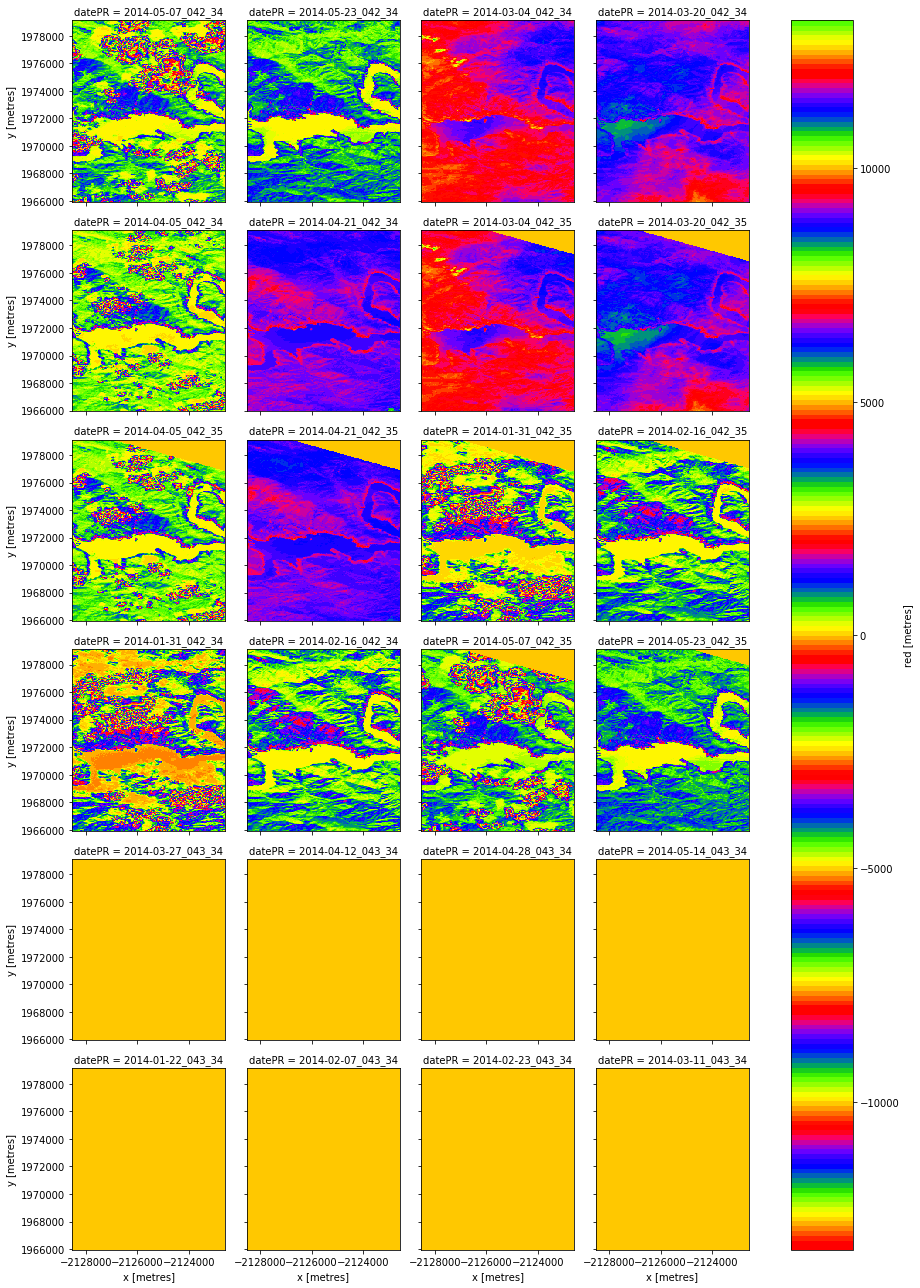

In [11]:
%matplotlib inline
display_color = 'red'
ds[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='prism')

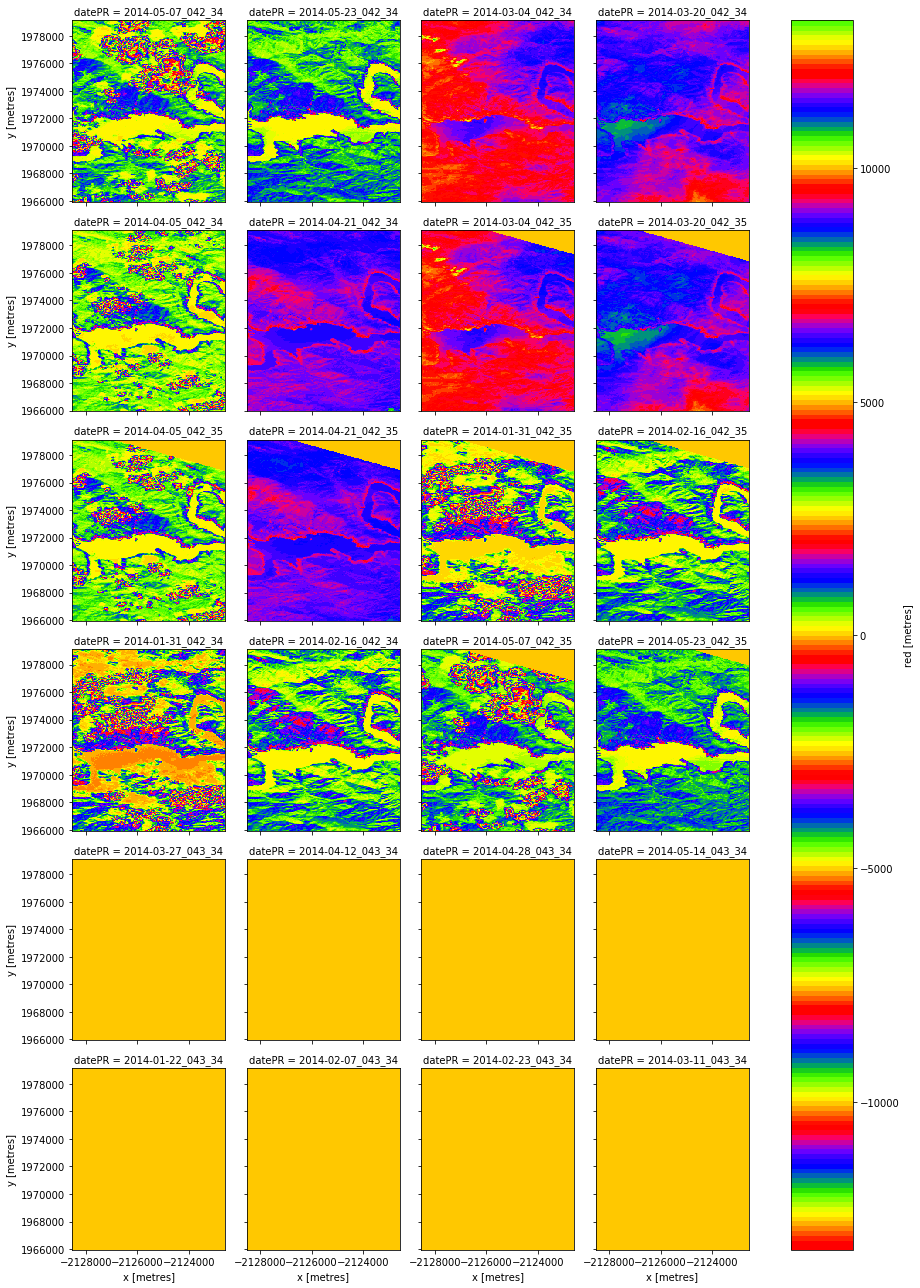

In [12]:
ds[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='prism')

In [13]:
panda_df.head()

,product,band,path,row,date,red,green,blue,nir,pixel_qa
0,LC08_L2SP,band4.TIF,042,34,2014-05-07,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...
1,LC08_L2SP,band4.TIF,042,34,2014-05-23,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...
2,LC08_L2SP,band4.TIF,042,34,2014-03-04,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...
3,LC08_L2SP,band4.TIF,042,34,2014-03-20,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...
4,LC08_L2SP,band4.TIF,042,34,2014-04-05,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...,s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...


In [14]:
df = panda_df

In [15]:
df.iloc[0]

product                                             LC08_L2SP
band                                                band4.TIF
path                                                      042
row                                                        34
date                                               2014-05-07
red         s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...
green       s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...
blue        s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...
nir         s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...
pixel_qa    s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2...
Name: 0, dtype: object

In [16]:
df.iloc[0]['red']

's3://lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140507_20171310_01_A1/LC08_L2SP_042034_20140507_20171310_01_A1_sr_band4.TIF'

In [17]:
redfile = df.iloc[0]['red']

In [18]:
import rasterio
with rasterio.open(redfile) as src:
    print(src.crs)

PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.2569999999957,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]


In [19]:
print (src)

<closed DatasetReader name='s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140507_20171310_01_A1/LC08_L2SP_042034_20140507_20171310_01_A1_sr_band4.TIF' mode='r'>


In [20]:
print(src.width, src.height)

8601 8801


In [21]:
print(src.shape)

(8801, 8601)


In [22]:
print(src.res)

(30.0, 30.0)


# Compare x,y orientation agains the steps of ODC-heavy

1. new notebook p0-understand datacube xarray capabilities

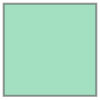

In [23]:
# https://medium.com/@pramukta/recipe-importing-geojson-into-shapely-da1edf79f41d
import json
from shapely.geometry import shape, GeometryCollection

#with open("geojson_file.geojson") as f:
with open(my_aoi_file) as f:
  features = json.load(f)["features"]

# NOTE: buffer(0) is a trick for fixing scenarios where polygons have overlapping coordinates 
geometry = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])
geometry

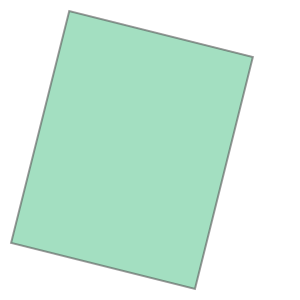

In [24]:
from functools import partial
import shapely.ops
import pyproj

# Suppose geometry is an instance of shapely.geometry.Geometry
tfm = partial(pyproj.transform, 
              pyproj.Proj(init="epsg:4326"), 
              pyproj.Proj(init="epsg:5072"))
reprojected = shapely.ops.transform(tfm, geometry)

reprojected